## This notebook will discuss the following:
* [Customizing Plot Legends](#scrollTo=yLNrYqjnOSjQ)
* [Choosing Elements for the Legend](#scrollTo=VrqmAalLOSju)
* [Legend for Size of Points](#scrollTo=VtxboxwBOSj4)
* [Multiple Legends](#scrollTo=ONxMBlPTOSj-)
* [Ejercicios de Legendas](#scrollTo=1RU3pWLE-DYU&line=1&uniqifier=1)

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.

First we have to upload the file with the data on California cities.

# Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements.
We previously saw how to create a simple legend; here we'll take a look at customizing the placement and aesthetics of the legend in Matplotlib.

The simplest legend can be created with the ``plt.legend()`` command, which automatically creates a legend for any labeled plot elements:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('classic')

In [ ]:
%matplotlib inline
import numpy as np

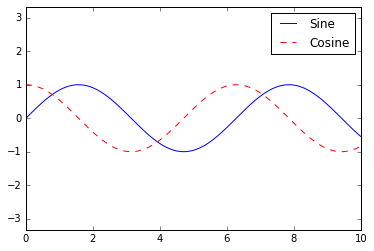

In [ ]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

But there are many ways we might want to customize such a legend.
For example, we can specify the location and turn off the frame:

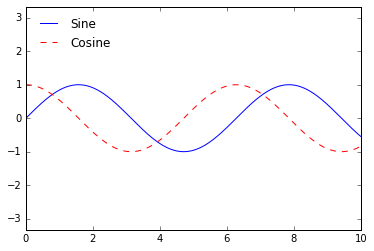

In [ ]:
ax.legend(loc='upper left', frameon=False)
fig

We can use the ``ncol`` command to specify the number of columns in the legend:

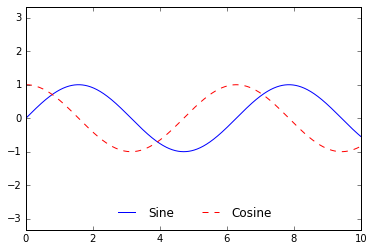

In [ ]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

We can use a rounded box (``fancybox``) or add a shadow, change the transparency (alpha value) of the frame, or change the padding around the text:

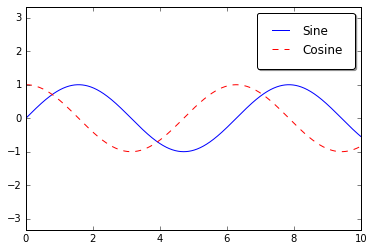

In [ ]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

For more information on available legend options, see the ``plt.legend`` docstring.

## Choosing Elements for the Legend

As we have already seen, the legend includes all labeled elements by default.
If this is not what is desired, we can fine-tune which elements and labels appear in the legend by using the objects returned by plot commands.
The ``plt.plot()`` command is able to create multiple lines at once, and returns a list of created line instances.
Passing any of these to ``plt.legend()`` will tell it which to identify, along with the labels we'd like to specify:

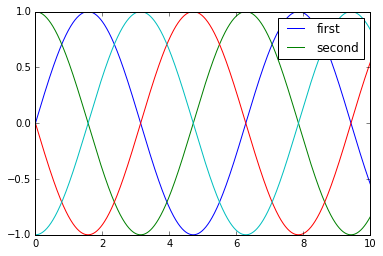

In [ ]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

I generally find in practice that it is clearer to use the first method, applying labels to the plot elements you'd like to show on the legend:

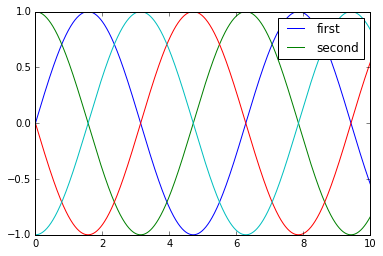

In [ ]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

Notice that by default, the legend ignores all elements without a ``label`` attribute set.

## Legend for Size of Points

Sometimes the legend defaults are not sufficient for the given visualization.
For example, perhaps you're be using the size of points to mark certain features of the data, and want to create a legend reflecting this.
Here is an example where we'll use the size of points to indicate populations of California cities.

First we have to upload the file with the data on California cities.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving california_cities.csv to california_cities.csv


We'd like a legend that specifies the scale of the sizes of the points, and we'll accomplish this by plotting some labeled data with no entries:

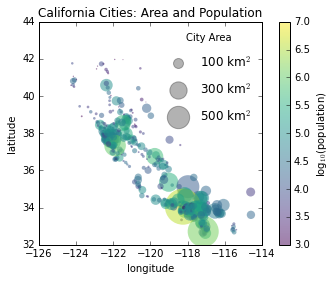

In [ ]:
import pandas as pd
cities = pd.read_csv('california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
#plt.axis(aspect='equal')
plt.gca().set_aspect('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

The legend will always reference some object that is on the plot, so if we'd like to display a particular shape we need to plot it.
In this case, the objects we want (gray circles) are not on the plot, so we fake them by plotting empty lists.
Notice too that the legend only lists plot elements that have a label specified.

By plotting empty lists, we create labeled plot objects which are picked up by the legend, and now our legend tells us some useful information.
This strategy can be useful for creating more sophisticated visualizations.


## Multiple Legends

Sometimes when designing a plot you'd like to add multiple legends to the same axes.
Unfortunately, Matplotlib does not make this easy: via the standard ``legend`` interface, it is only possible to create a single legend for the entire plot.
If you try to create a second legend using ``plt.legend()`` or ``ax.legend()``, it will simply override the first one.
We can work around this by creating a new legend artist from scratch, and then using the lower-level ``ax.add_artist()`` method to manually add the second artist to the plot:

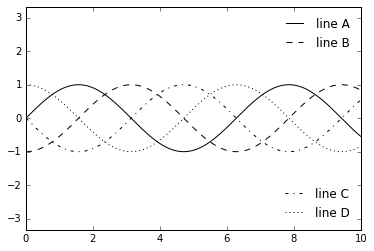

In [ ]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);

This is a peek into the low-level artist objects that comprise any Matplotlib plot.
If you examine the source code of ``ax.legend()`` (recall that you can do this with within the IPython notebook using ``ax.legend??``) you'll see that the function simply consists of some logic to create a suitable ``Legend`` artist, which is then saved in the ``legend_`` attribute and added to the figure when the plot is drawn.

#Ejercicios de Legendas

Elija dos de los gráficos realizados en ejercicios anteriores y agregue legendas como sea apropiado para hacer la información más comprensible. 

Gráfico 1

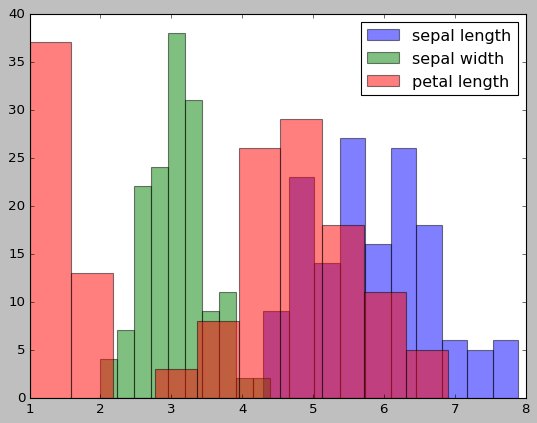

In [4]:
# Cargar el conjunto de datos Iris
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Crear histogramas para cada atributo
plt.hist(df['sepal_length'], alpha=0.5, label='sepal length')
plt.hist(df['sepal_width'], alpha=0.5, label='sepal width')
plt.hist(df['petal_length'], alpha=0.5, label='petal length')

# Agregar leyenda
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.show()

Gráfico 2

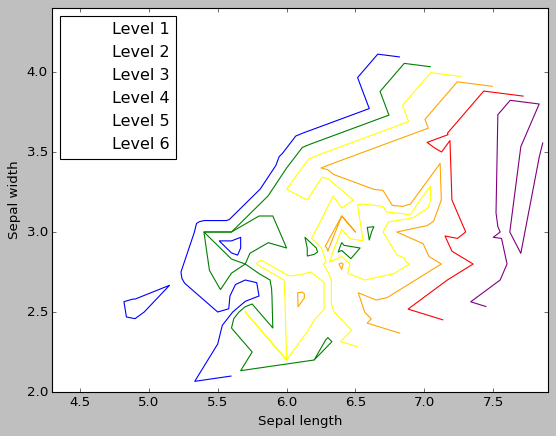

In [13]:
# Importar el dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

# Crear contour plot
fig, ax = plt.subplots()

# Definir los niveles de contorno
levels = [4, 4.5, 5, 5.5, 6, 6.5, 7]
colores= ['blue', 'green', 'yellow', 'orange', 'red', 'purple', 'brown']
# Crear los contornos y agregar un label para cada uno
cntr = ax.tricontour(df.sepal_length, df.sepal_width, df.petal_length, levels=levels, colors=colores)
cntr.collections[0].set_label('Level 1')
cntr.collections[1].set_label('Level 2')
cntr.collections[2].set_label('Level 3')
cntr.collections[3].set_label('Level 4')
cntr.collections[4].set_label('Level 5')
cntr.collections[5].set_label('Level 6')

# Agregar un plot legend
plt.legend(loc='upper left')

# Configurar el eje x e y
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')

plt.show()